# ANN Training Strategies
<hr style="border:2px solid black">

**Load packages**

In [1]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# miscellaneous
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# deep learning stack
import tensorflow as tf
from tensorflow import keras

In [2]:
# tensorflow and keras version
print(f'TensorFlow version: {tf.__version__}')
print(f'Keras version: {tf.keras.__version__}')

TensorFlow version: 2.11.0
Keras version: 2.11.0


## Fasion Dataset

In [3]:
# load data
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# 60000: observations/samples
# 28, 28: widthxheight of a single image

xtrain.shape

(60000, 28, 28)

In [5]:
xtrain.min(), xtrain.max()

(0, 255)

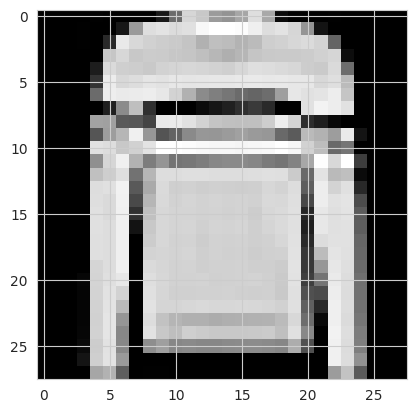

In [6]:
# plot an image
plt.imshow(xtrain[5], cmap='Greys_r');

In [7]:
class_names[ytrain[5]]

'Pullover'

In [8]:
ytrain[5]

2

### Preprocess data

In [9]:
# flatten the input
xtrain_flatten = xtrain.reshape((60000, 28*28))
xtrain_flatten.shape

(60000, 784)

In [ ]:
xtrain_flatten[0]

In [ ]:
# plot the flattened "image"
plt.imshow(xtrain_flatten[0].reshape((1, 28*28)));

In [ ]:
# convert output to one hot encoded matrix -> multi-class classification
ytrain_categorical = tf.keras.utils.to_categorical(ytrain)
ytrain_categorical.shape

In [ ]:
ytrain_categorical[0]

### Set up the model and it's layers

In [ ]:
def model_builder():
    '''
    creates a ANN model by stacking dense layers 
    '''
    # initialize the Sequential API to stack the layers
    model = keras.Sequential()
    
    # first hidden layer
    model.add(
        keras.layers.Dense(
            units=64, 
            activation='relu',
            input_shape=(28*28, )
        )
    )
    # dropout: randomly set 20% of the previous output to zero
    model.add(
        keras.layers.Dropout(
            rate=0.2
        )
    )
    # output layer with softmax activation function
    model.add(
        keras.layers.Dense(
            units=10,
            activation='softmax'
        )
    )
    # compile model
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.categorical_crossentropy,
        metrics=[keras.metrics.categorical_accuracy]
    )

    return model

In [ ]:
model = model_builder()

In [ ]:
# how many weights do we have in total?
model.summary()

### Fit the model

In [ ]:
# early stopping
stop_early = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5
)

In [ ]:
results = model.fit(
    xtrain_flatten,
    ytrain_categorical, 
    epochs=100, # number of iterations through the complete dataset            
    batch_size=256, # number of observations used when updating weights, gradient        
    validation_split=0.2, # 20% of the data is used for validation
    callbacks=[stop_early]
)

### Inspect the learning curves

In [ ]:
# losses in the training history
losses = pd.DataFrame(model.history.history)
# training loss
loss = losses['loss'].values 
# validation loss
val_loss = losses['val_loss'].values

# epoch number
epoch = losses.index.values + np.ones_like(losses.index.values)

In [ ]:
# plot losses against epoch number in log-scale
plt.figure(figsize=(8,4),dpi=100)
plt.semilogx(epoch, loss, linewidth=1.5, label='loss')
plt.semilogx(epoch, val_loss, linewidth=1.5, label='val_loss')

plt.xlabel('epoch',fontsize=10)
plt.ylabel('loss value',fontsize=10)
plt.legend(loc=1,fontsize=10);

<hr style="border:2px solid black">

## References

- [Neural networks tutorial: Training strategy](https://www.neuraldesigner.com/learning/tutorials/training-strategy)
- [What should I do when my neural network doesn't learn?](https://stats.stackexchange.com/questions/352036/what-should-i-do-when-my-neural-network-doesnt-learn)
- [Activation function: Wikipedia](https://en.wikipedia.org/wiki/Activation_function)
- [Cross-Entropy Loss Function](https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e#:~:text=Categorical%20cross%2Dentropy%20is%20used,%5D%20for%203%2Dclass%20problem.)
- [Weight Initialization for Deep Learning Neural Networks](https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/)